<a href="https://colab.research.google.com/github/yingzibu/ODE/blob/main/learn/normal_log_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### If x ~ N($\mu$, $\sigma^2$), then what does log x and exp(x) look like?

#### Should be notified that log x does not exist for x < 0

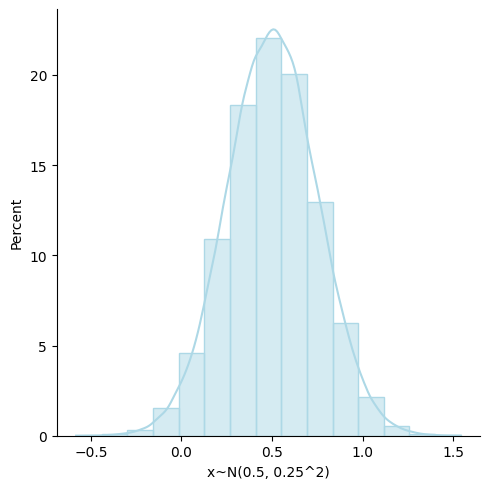

In [43]:
N = 1000000 # sample number
sigma = 0.25
mu = 0.5

np.random.seed(1)
data = np.random.normal(size=N, loc=mu, scale=sigma)
df = pd.DataFrame(data, columns=[f'x~N({mu}, {sigma}^2)'])
sns.displot(df, kde=True, bins=15, stat='percent',
            color='lightblue', ec='lightblue', x = df.columns[0])

In [47]:
exp_data = np.exp(data)
exp_exp = np.exp(exp_data)
exp_neg_exp = np.exp(-1 * exp_data)
data_copy = data.copy()
data_copy[data_copy<=0] = 1e-10
log_data = np.log(data_copy)
log_copy = log_data.copy()
log_copy[log_copy<=0] = 1e-10
log_log = np.log(log_copy)
df['exp_x'] = pd.DataFrame(exp_data)
df['exp_exp_x'] = pd.DataFrame(exp_exp)
df['exp_neg_exp_x'] = pd.DataFrame(exp_neg_exp)
df['log_x'] = pd.DataFrame(log_data)
df['log_log_x'] = pd.DataFrame(log_log)
fig_num = df.shape[-1]
df.head()

,"x~N(0.5, 0.25^2)",exp_x,exp_exp_x,exp_neg_exp_x,log_x,log_log_x
0,0.906086,2.474619,11.877178,0.084195,-0.098621,-23.025851
1,0.347061,1.414903,4.116087,0.242949,-1.058255,-23.025851
2,0.367957,1.444780,4.240919,0.235798,-0.999789,-23.025851
3,0.231758,1.260814,3.528294,0.283423,-1.462062,-23.025851
4,0.716352,2.046952,7.744261,0.129128,-0.333584,-23.025851


drawing distribution: 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]


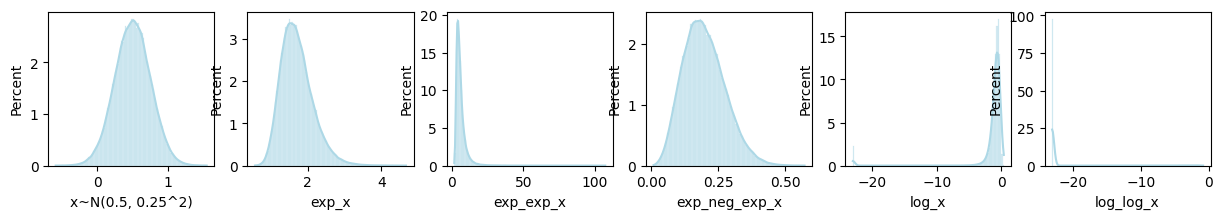

In [48]:
fig, axes = plt.subplots(1, fig_num)
fig.set_figwidth(15)
fig.set_figheight(int(15/fig_num))
for i in tqdm(range(fig_num), total=fig_num, desc='drawing distribution'):
    # print(i)
    sns.histplot(df, kde=True, bins=20*fig_num, stat='percent',
            color='lightblue', ec='lightblue', x = df.columns[i], ax=axes[i])

In [66]:
def plot_dist(mu, sigma, N, seed=1):
    np.random.seed(seed)
    data = np.random.normal(size=N, loc=mu, scale=sigma)
    df = pd.DataFrame(data, columns=[f'x~N({mu}, {sigma}^2)'])
    # sns.displot(df, kde=True, bins=15, stat='percent',
    #             color='lightblue', ec='lightblue', x = df.columns[0])
    exp_data = np.exp(data)
    exp_exp = np.exp(exp_data)
    exp_neg_exp = np.exp(-1 * exp_data)
    data_copy = data.copy()
    data_copy[data_copy<=0] = 1e-10
    log_data = np.log(data_copy)
    log_copy = log_data.copy()
    log_copy[log_copy<=0] = 1e-10
    log_log = np.log(log_copy)
    df['exp_x'] = pd.DataFrame(exp_data)
    df['exp_exp_x'] = pd.DataFrame(exp_exp)
    df['exp_neg_exp_x'] = pd.DataFrame(exp_neg_exp)
    df['log_x'] = pd.DataFrame(log_data)
    df['log_log_x'] = pd.DataFrame(log_log)
    pd.options.mode.use_inf_as_na = True
    df.fillna(1e10, inplace=True)
    fig_num = df.shape[-1]
    # df.head()
    fig, axes = plt.subplots(1, fig_num)
    fig.set_figwidth(15)
    fig.set_figheight(int(15/fig_num))
    for i in tqdm(range(fig_num), total=fig_num, desc='drawing distribution'):
        # print(i)
        try:
            sns.histplot(df, kde=True, bins=20*fig_num, stat='percent',
                color='lightblue', ec='lightblue', x = df.columns[i], ax=axes[i])
        except:
            print('error handing:', df.columns[i])

    plt.show(); plt.close()


drawing distribution: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]


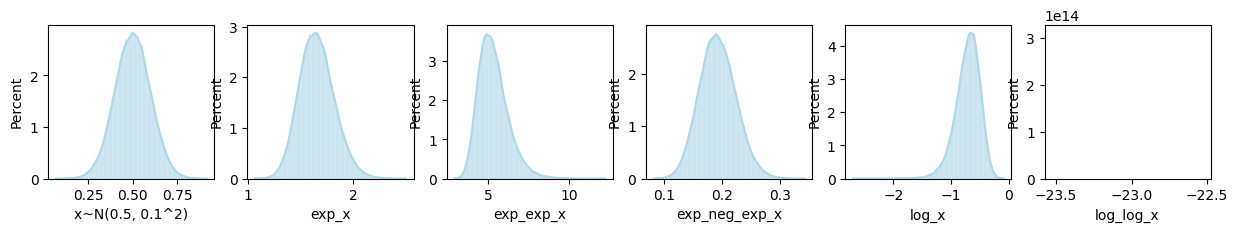

drawing distribution: 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]


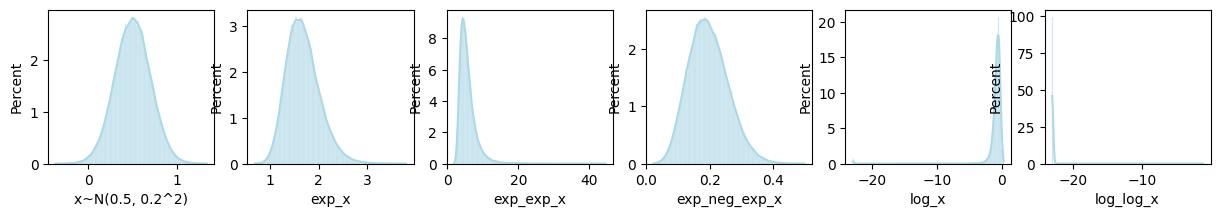

drawing distribution: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]


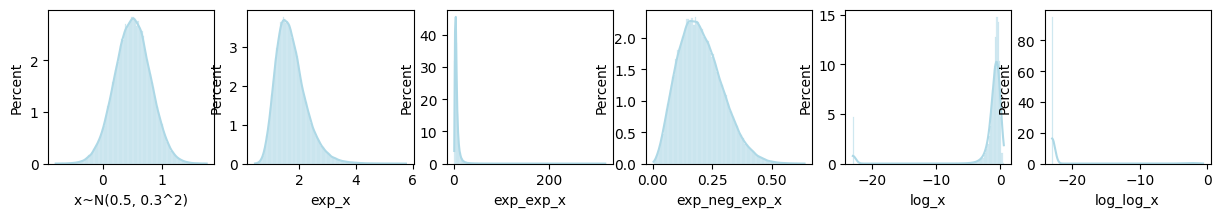

drawing distribution: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]


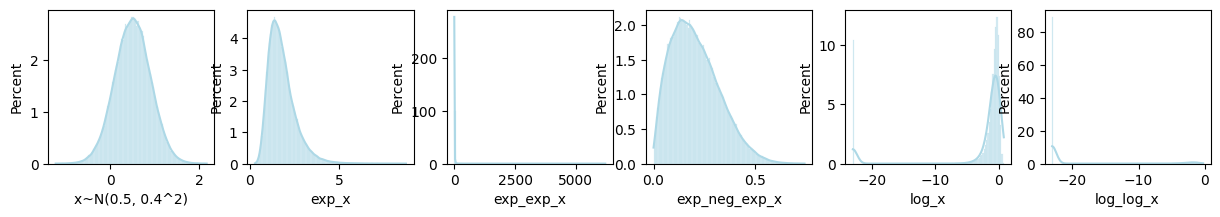

drawing distribution: 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]


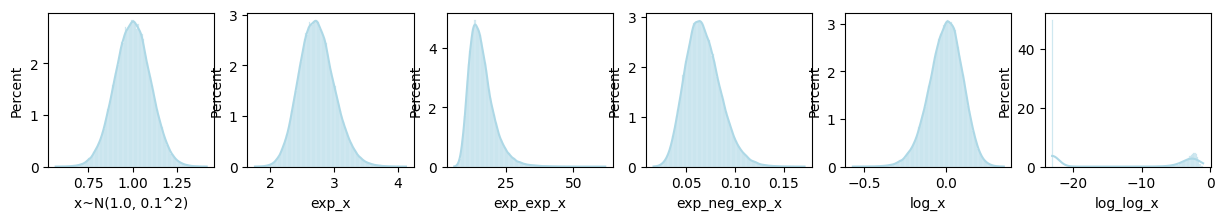

drawing distribution: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]


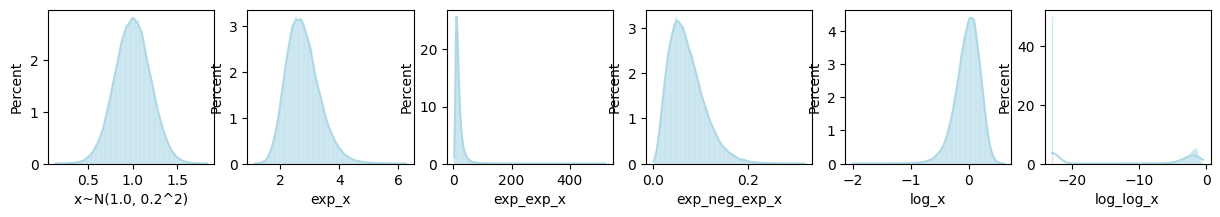

drawing distribution: 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]


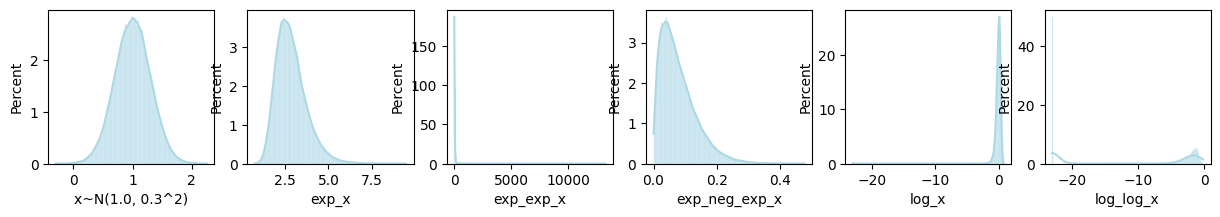

drawing distribution: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]


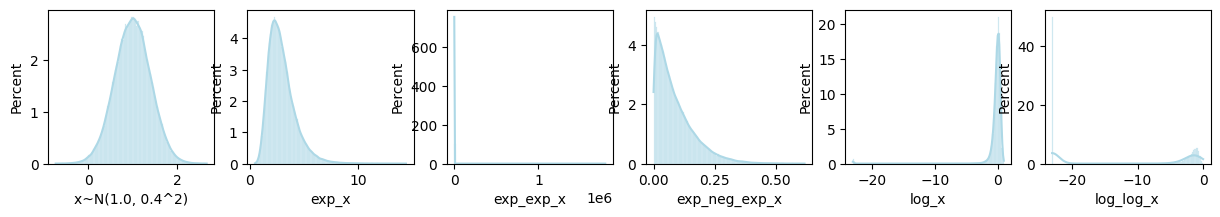

drawing distribution: 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


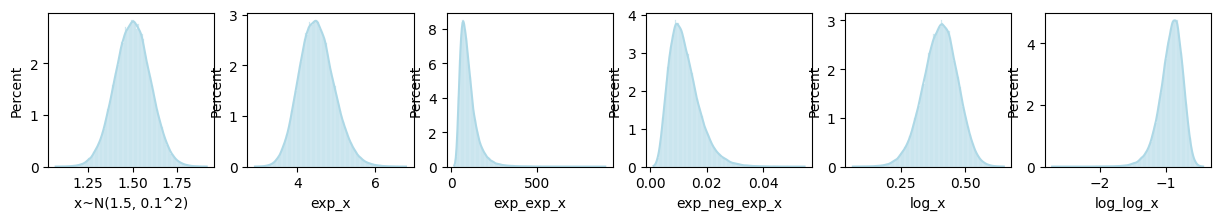

drawing distribution: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]


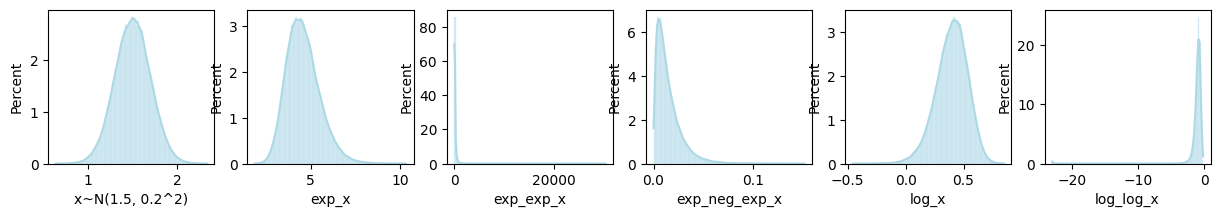

drawing distribution: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]


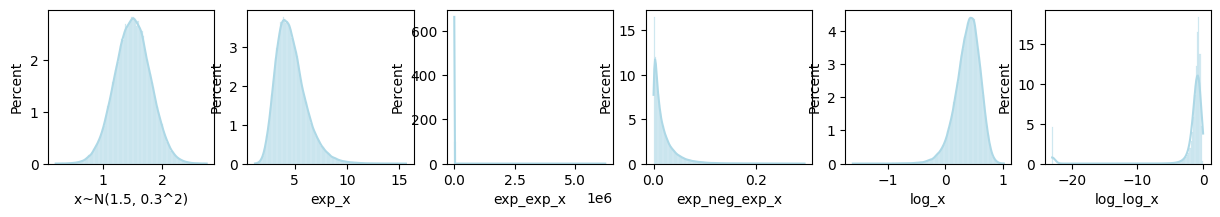

drawing distribution: 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]


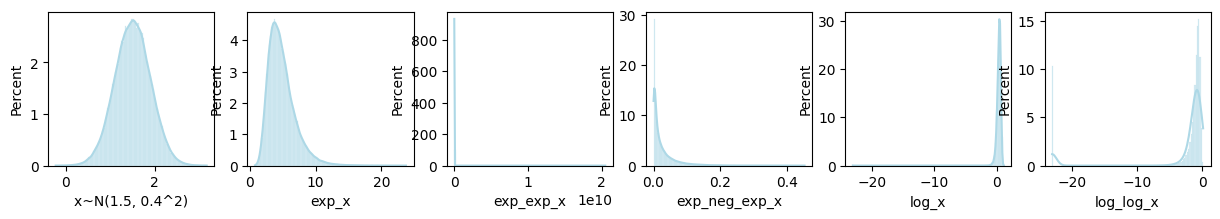

drawing distribution: 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]


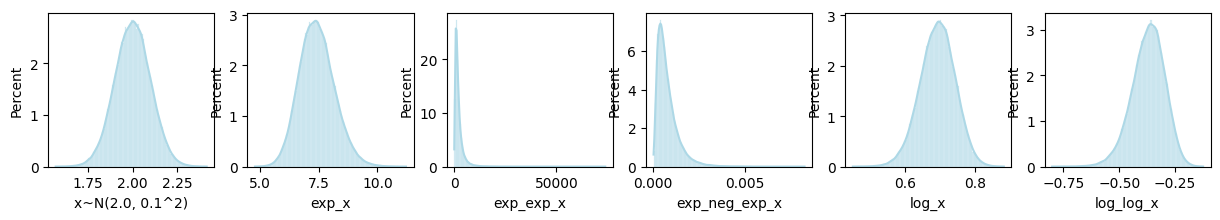

drawing distribution: 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]


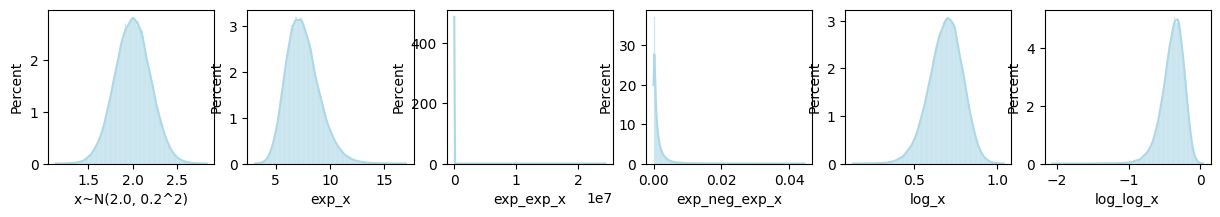

drawing distribution: 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]


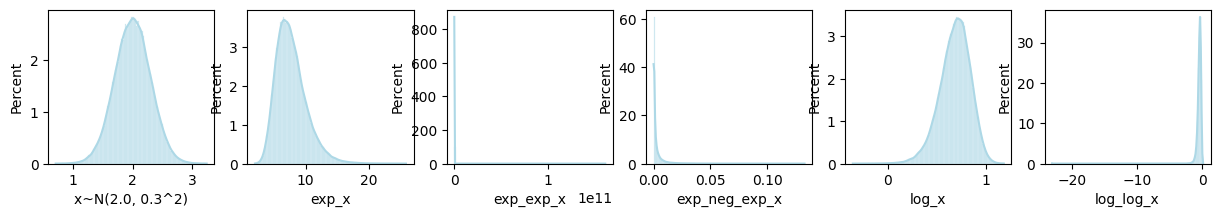

drawing distribution: 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


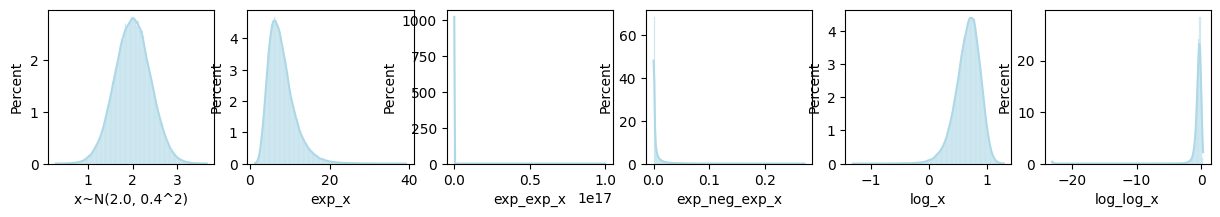

In [71]:
for i in range(1, 5):
    for j in range(1, 5):
        mu = round(i * 0.5, 1)
        sigma = round(j * 0.1, 1)
        df = plot_dist(mu, sigma, N)

In [ ]:

# sns.displot(df, kde=True, bins=15, stat='percent',
#             color='lightblue', ec='lightblue', x = df.columns[0])
# sns.displot(df, kde=True, bins=15, stat='percent',
#             color='lightblue', ec='lightblue', x = df.columns[1])
# sns.displot(df, kde=True, bins=15, stat='percent',
#             color='lightblue', ec='lightblue', x = df.columns[2])
# # ax.set_xlabel(f'mu = {mu}, sigma = {sigma}')
# plt.show()